# Жутко (интересная) домашка. Начало
Для начала импортируем самое нужное, остальное - по мере необходимости.

In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных и их исследование
Загрузка происходит напрямую из гугл-диска, который предоставляется в задании, чтобы не приходилось ни скачивать этот диск, ни перезагружать в ноутбук нужные файлы каждую сессию.

In [ ]:
data_url = 'https://drive.google.com/file/d/1K-tf97Hjklw_eHFxeup36bBpElSC1hrb/view?usp=sharing'

data_path = 'https://drive.google.com/uc?export=download&id=' + data_url.split('/')[-2]

data = pd.read_csv(data_path)

~~Воруем~~ Копируем из задания списки численных и категориальных признаков. <br>
(Бонусом - удобные переменные *feature_cols* и *target_col*, их еще будем использовать)

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим на случайные строки датафрейма

In [ ]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
205,60,94.15,5811.8,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,No,Bank transfer (automatic),0
547,15,75.10,1151.55,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0
3561,12,85.15,979.05,Female,0,No,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,No,One year,Yes,Credit card (automatic),0
1206,37,19.85,784.25,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
2367,22,100.65,2415.95,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0


Красивенько... <br>
А теперь посмотрим общую информацию по столбцам.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Стоп. *TotalSpent* - типа *object*? И находится в *num_cols*...<br>
У нас так не принято. Чистим данные, ребята.

In [ ]:
for col in num_cols:
  data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

5273 ненулевых значения при 5282 строках. Определенно есть NaN'ы! Надо их почистить.

In [ ]:
data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())

Теперь там точно всё хорошо. ~~Наверно.~~

# Анализ данных
Импортируем нужные для визуализации библиотеки и погнали!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Сразу делаем красивые гистограммки при помощи *seaborn*, помещая их на одну картинку через *subplots*. Красивенько же? =D

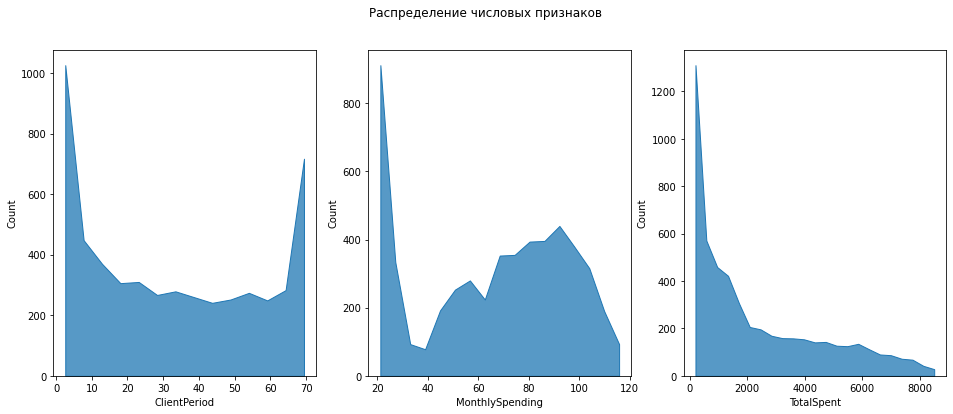

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Распределение числовых признаков")

for i in range(3):
  sns.histplot(ax=axes[i], data=data, x=num_cols[i], element='poly')

График *TotalSpent* такой: хи-хи )))0)0)) <br> 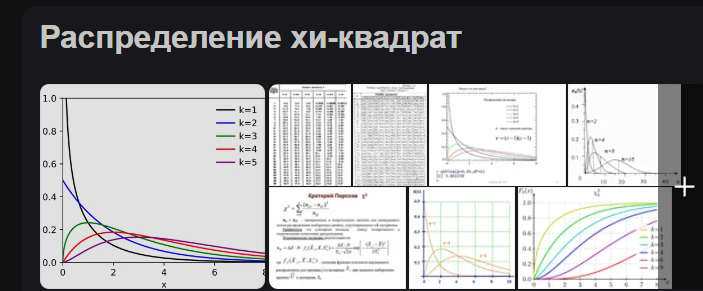

Посмотрим, что там у категориальных признаков <br>
*Осторожно, много листать*

In [ ]:
for cat in cat_cols:
  print(data.value_counts(cat), end='\n\n')

Sex
Male      2655
Female    2627
dtype: int64

IsSeniorCitizen
0    4440
1     842
dtype: int64

HasPartner
No     2705
Yes    2577
dtype: int64

HasChild
No     3676
Yes    1606
dtype: int64

HasPhoneService
Yes    4761
No      521
dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
dtype: int64

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
dtype: int64

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
dtype: int64

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
dtype: int64

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
dtype: int64

HasTechSupportAccess
No                     2604
Yes                    1537
No internet service    1141
dtype: int64

HasOnlineTV
No                     2099
Yes                    2042
No i

А теперь красивенько это дело визуализируем...

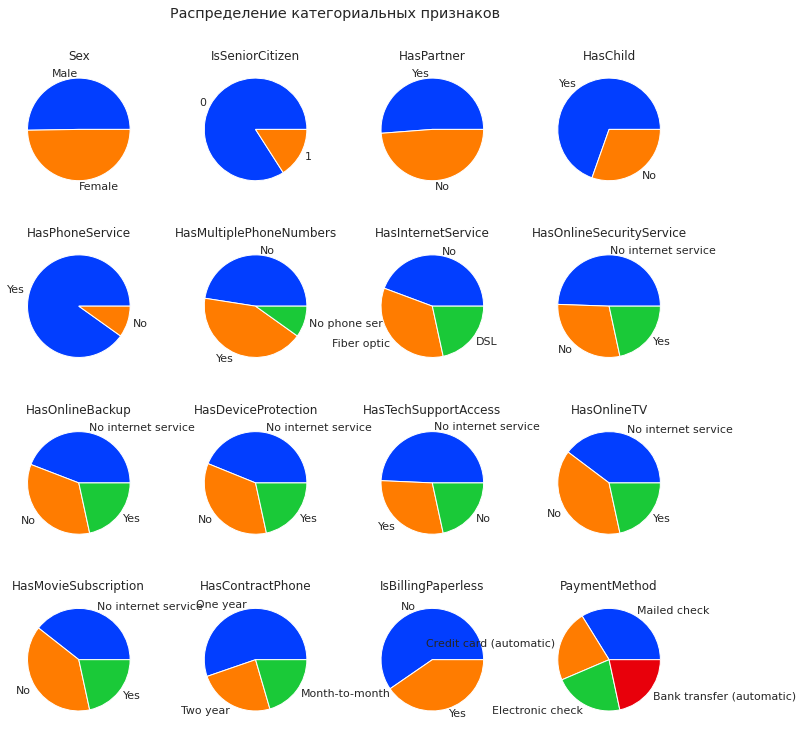

In [ ]:
sns.set()
colors = sns.color_palette('bright')

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Распределение категориальных признаков', y=1.05)
fig.tight_layout()

col_index = 0
for i in range(4):
  for j in range(4):
    axes[i, j].pie(data=data, x=data.value_counts(cat_cols[col_index]), labels=data[cat_cols[col_index]].unique(), colors=colors)
    axes[i, j].set_title(cat_cols[col_index])
    col_index += 1

Ну и куда же без целевой переменной

([<matplotlib.patches.Wedge at 0x7f8dc3bf74d0>,
 [Text(-0.7478930722742168, 0.8066324766857789, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')])

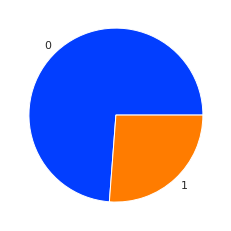

In [ ]:
# Распределение классов целевой переменной 
plt.pie(data=data, x=data.value_counts(target_col), labels=[0, 1], colors=colors)

Дисбаланс классов <br>
Отказываемся от метрики ***accuracy*** и будем применять методы для борьбы с дисбалансом. <br>
Функция потерь - ***LogLoss*** или ***ROC-AUC***

# Применение линейных моделей
Да начнется непонятная хрень...

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

*LabelEncoder* зарекомендовал себя как отстойный выбор, поэтому берем только версию с *OneHotEncoder*'ом, просто потому что. <br> 
Нормализуем численные признаки, кодируем категориальные...

Напишем небольшую функцию, чтобы удобно обрабатывать датафрейм <br>
Параметр *test* - чтобы при *test=True* обработать и тестовый датафрейм.
*(Да, я не справился с оформлением пайплайна)*

In [ ]:
def prepare_df(df, Scaler, Encoder, test=False):
  num_data = df[num_cols].copy()
  num_data[num_cols] = Scaler.transform(num_data[num_cols])

  cat_data = df[cat_cols].copy()
  new_cols = pd.DataFrame((Encoder.transform(cat_data[cat_cols]).toarray())).astype(np.int)
  cat_data = pd.concat([cat_data, new_cols], axis=1).drop(cat_cols, axis=1)
  cat_data = cat_data.rename(columns={x: str(x) for x in cat_data.columns})
  
  if not test:
    return pd.concat([num_data, cat_data, df[target_col]], axis=1)
  else:
    return pd.concat([num_data, cat_data], axis=1)

In [ ]:
scaler = StandardScaler().fit(data[num_cols])
ohe = OneHotEncoder(drop='first').fit(data[cat_cols])

prepared_data = prepare_df(data, scaler, ohe)
new_features = prepared_data.columns[:-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
prepared_data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,...,18,19,20,21,22,23,24,25,26,Churn
2662,-0.708693,-0.469773,-0.706475,1,0,0,0,0,1,0,...,1,0,1,1,0,0,0,1,0,0
1151,-0.871640,-0.309037,-0.753847,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3998,-1.279005,-1.507104,-1.001448,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
625,-1.279005,-0.178128,-0.983760,1,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3671,0.839294,-1.459048,-0.504526,0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0


Красивенько...

Попытка номер раз: *LogisticRegression* с подбором через *GridSearchCV*

In [ ]:
model = LogisticRegression(random_state=42)

params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 10, 50, 100, 150, 500, 1000],
    'max_iter': [50, 100, 150, 200, 500]
    }

grid = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=5)

grid.fit(prepared_data[new_features], prepared_data[target_col])

Что же там...

In [ ]:
grid.best_score_

0.8450712866406885

In [ ]:
grid.best_estimator_

LogisticRegression(C=150, max_iter=150, random_state=42, solver='saga')

### Вывод:
При С = 150, max_iter = 150, solver = 'saga' обычная линейная регрессия получает результат ~0.845

Попробуем теперь *LogisticRegressionCV*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prepared_data[new_features], prepared_data[target_col])

In [ ]:
clf = LogisticRegressionCV(random_state=42, cv=5, refit=True, scoring='roc_auc')
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=42, scoring='roc_auc')

In [ ]:
clf.score(X_test, y_test)

0.8438268860234178

In [ ]:
clf.C_

array([2.7825594])

In [ ]:
clf.l1_ratios_

array([None], dtype=object)

###Вывод:
При С = 2.7825594 (~ 2.78) и отсутствии регуляризации получаем результат примерно 0.844 - чуть меньше, чем при обычной лог.регрессии

# Применение градиентного бустинга
Ну хоть тут будет 99%????

Сначала установим *catboost*, а то его изначально нет в ноутбуке.

In [ ]:
!setup.py install
!pip install catboost

/bin/bash: setup.py: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


Импортируем классификатор, разбиваем выборку на train/test и надеемся, что CatBoost обработает данные лучше...

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
boost_data = data.copy()
X_train, X_test, y_train, y_test = train_test_split(boost_data[feature_cols], boost_data[target_col])

Тыкаем куда попало, надеясь на лучшее...

In [ ]:
cb_clf = CatBoostClassifier(eval_metric='AUC', random_seed=42, n_estimators=2000, learning_rate=0.01) # Кажется, при таких параметрах лучше всего
cb_clf.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_cols, verbose=False)

In [ ]:
cb_clf.best_score_

{'learn': {'Logloss': 0.30586387528527487},
 'validation': {'Logloss': 0.4289455011278581, 'AUC': 0.8235987427972761}}

Че-то не очень как-то...

##Вывод:
Получилось, что *LogisticRegression* имеет лучшие результаты, её и будем использовать дальше<br>

# Предсказания

In [ ]:
best_model = grid

Загружаем все нужное, обрабатываем тестовые данные...

In [ ]:
test_url = 'https://drive.google.com/file/d/1ZDlKZdX0arZLQfqu9qNy7Oh2BvdeE_1Z/view?usp=sharing'
test_path = 'https://drive.google.com/uc?export=download&id=' + test_url.split('/')[-2]
test = pd.read_csv(test_path)

submission_url = 'https://drive.google.com/file/d/1FMEFDp-SBt5yxka5WAetGpDd7Ry_3szh/view?usp=sharing'
submission_path = 'https://drive.google.com/uc?export=download&id=' + submission_url.split('/')[-2]
submission = pd.read_csv(submission_path)

for col in num_cols:
  test[col] = pd.to_numeric(test[col], errors='coerce')
test['TotalSpent'] = test['TotalSpent'].fillna(test['TotalSpent'].median())

In [ ]:
prepared_test = prepare_df(test, scaler, ohe, test=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
prepared_test.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,24,25,26
1526,1.083713,-0.118473,0.597934,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1376,-0.627220,-1.452420,-0.839968,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1665,-1.279005,0.154945,-0.979328,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1397,0.513402,-1.341396,-0.530020,1,0,1,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
1527,-1.075322,0.948685,-0.773431,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0


Ну и упаковываем решение в файлик

In [ ]:
submission['Churn'] = best_model.predict(prepared_test)
submission.to_csv('./my_submission.csv', index=False)

# Итог

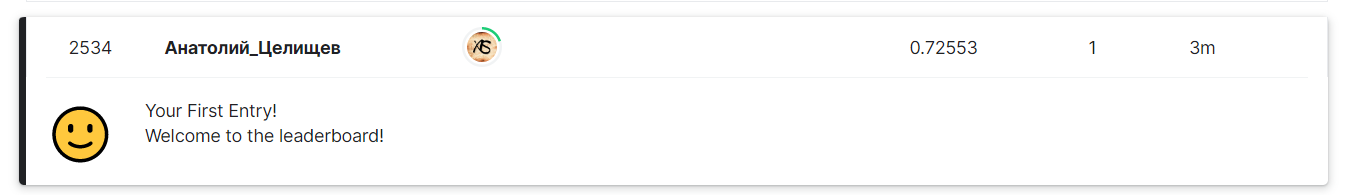

Обидненько, ну да ладно, есть куда стремиться =)